In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import os
from os import listdir, getcwd

In [2]:
# Disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Getting file path list of each month extracted data
cwd = os.getcwd()
path = f"{cwd}/fipe-webscraping/extracted-data/raw-data/"
data_files = [path + file for file in listdir(path)]

# Concatenate each month data into a single data frame
fipe_data = pd.concat(map(lambda f: pd.read_csv(f, on_bad_lines='skip'), data_files))
fipe_data

,fipe_cod,tabela_id,anoref,mesref,tipo,marca_id,marca,modelo_id,modelo,anomod,comb_cod,comb_sigla,comb,valor
0,008021-7,309,2024,5,1,6,Audi,78,A4 2.4 30V Avant Tip./Multitronic,1998,1,G,Gasolina,22271
1,008154-0,309,2024,5,1,6,Audi,5549,A7 Sportback 3.0 TFSI Quattro S Tronic,2013,1,G,Gasolina,151731
2,008062-4,309,2024,5,1,6,Audi,126,A8 4.2 Quattro Tiptronic,2005,1,G,Gasolina,154789
3,008014-4,309,2024,5,1,6,Audi,127,A8 4.2 V8 32V Tiptronic,1995,1,G,Gasolina,27032
4,008242-2,309,2024,5,1,6,Audi,8628,RS4 2.9 Avant V6 TFSI Quattro Tiptronic,2021,1,G,Gasolina,580439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,046001-0,318,2025,2,1,27,Isuzu,1348,Amigo 2.3 4x2/4x4,1994,1,G,Gasolina,9012
255,046001-0,318,2025,2,1,27,Isuzu,1348,Amigo 2.3 4x2/4x4,1993,1,G,Gasolina,7477
256,046001-0,318,2025,2,1,27,Isuzu,1348,Amigo 2.3 4x2/4x4,1992,1,G,Gasolina,6599
257,046002-8,318,2025,2,1,27,Isuzu,1349,Hombre 2 WD XS 2.2,1998,1,G,Gasolina,12021


In [4]:
fipe_data[['modelo','anomod']].value_counts()

modelo                                    anomod
Corsa Sed Class.Super 1.0/1.0 FlexPower   2005      2
Corsa Sed.Wind 1.0/Millenium/Classic VHC  2002      2
F-1000 CD/Blazer 3.6                      1995      2
Escort Ghia 2.0i / 2.0                    1995      2
Fiorino Furgão 1.0                        1996      2
                                                   ..
iX XDrive 40 Aut. (Elétrico)              2024      1
iX XDrive 50 Sport Aut. (Elétrico)        2022      1
ix35 2.0 16V 2WD Flex Aut.                2019      1
ix35 GLS 2.0 16V 2WD Flex Aut.            2013      1
125i M Sport/Active Flex 2.0 TB Aut. 5p   2014      1
Name: count, Length: 4692, dtype: int64

In [5]:
# Convert 'valor' column to float
fipe_data['valor'] = fipe_data['valor'].astype(float)

# Generate statistics about 'valor' column
valor_stats = fipe_data['valor'].describe()

# Count of null values in 'valor' column
null_count = fipe_data['valor'].isnull().sum()

# Median of 'valor' column
valor_median = fipe_data['valor'].median()

# print the results
print(f"Statistics about 'valor' column:\n{valor_stats}")
print("\n")
print(f"Null values in 'valor' column: {null_count}")
print(f"Median of 'valor' column: {valor_median}")

Statistics about 'valor' column:
count      4713.00
mean     113478.88
std      331080.13
min        2317.00
25%       19796.00
50%       40981.00
75%       98510.00
max     6566975.00
Name: valor, dtype: float64


Null values in 'valor' column: 0
Median of 'valor' column: 40981.0


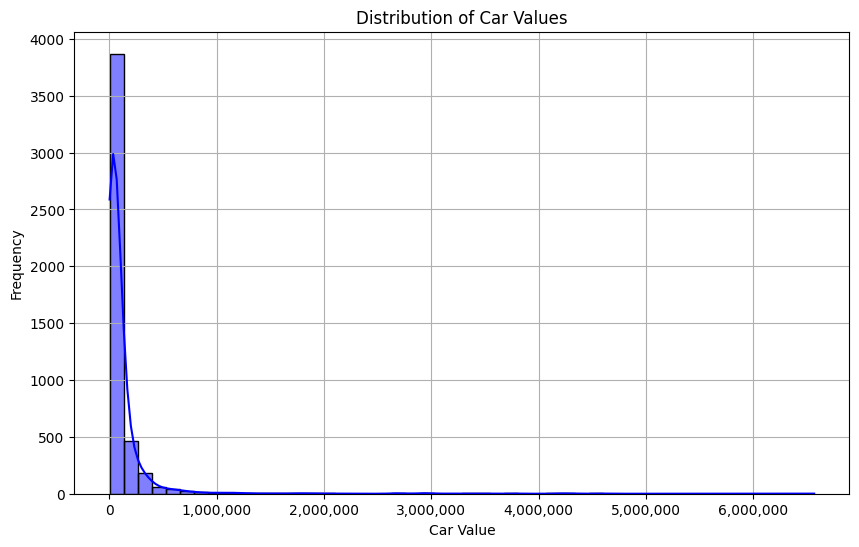

In [6]:
# Plotting the histogram of 'valor' column
plt.figure(figsize=(10, 6))
sns.histplot(fipe_data['valor'], bins=50, kde=True, color='blue')
plt.title("Distribution of Car Values")
plt.xlabel("Car Value")
plt.ylabel("Frequency")

# Adjusting x-axis to avoid scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True)

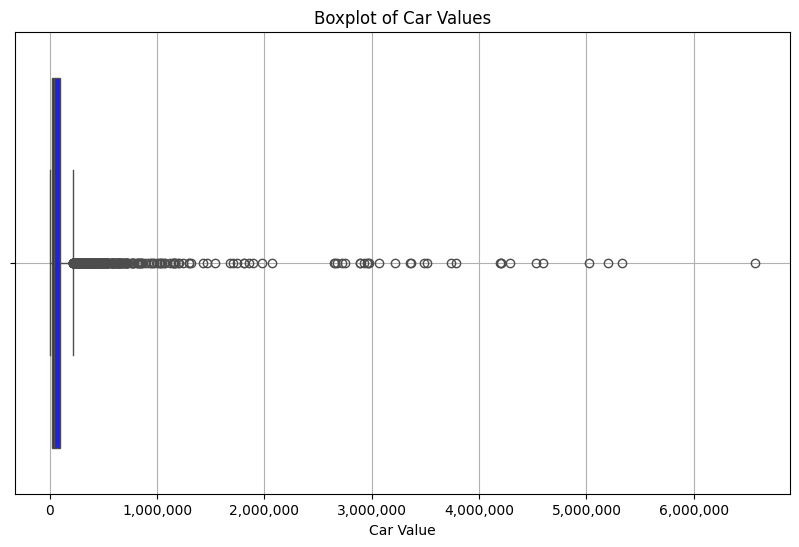

In [7]:
# Plotting the boxplot of 'valor' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=fipe_data['valor'], color='blue')
plt.title("Boxplot of Car Values")
plt.xlabel("Car Value")

# Adjusting x-axis for boxplot
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True)

### Visualizing Car Values Without Outliers

To improve the clarity of the visualizations and focus on the majority of the data, we decided to temporarily exclude outliers only in the visualizations. This allows us to better see the distribution of car values without affecting the underlying dataset.

We used the **Interquartile Range (IQR)** method to define the upper limit for values to be considered as outliers. Outliers are considered as values beyond 1.5 times the IQR above the third quartile or below the first quartile.

However, it is important to note that these outliers are not removed from the dataset itself, only from the visual representation, allowing us to focus on the typical car prices for more effective analysis and modeling.

- The **histogram** shows the distribution of car prices without the influence of outliers in the visualization.
- The **boxplot** helps to visualize the spread and central tendency of the data while excluding extreme values from the plot.



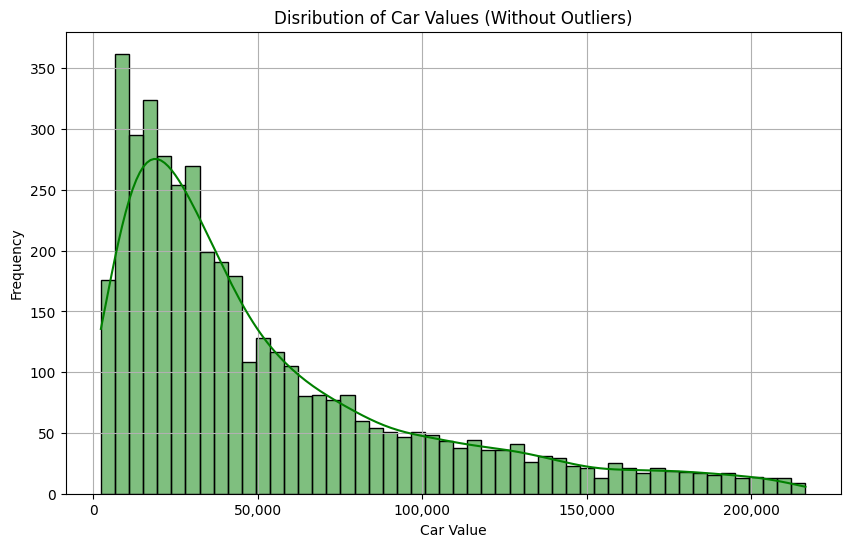

In [8]:
# Define the upper limit to trim outliers for visualization
upper_limit = fipe_data['valor'].quantile(0.75) + 1.5 * (fipe_data['valor'].quantile(0.75) - fipe_data['valor'].quantile(0.25))

# Filter the data only for visualization (do not modify the original dataset)
filtered_data_for_viz = fipe_data[fipe_data['valor'] <= upper_limit]

# Plotting the histogram of 'valor' column without outliers
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data_for_viz['valor'], bins=50, kde=True, color='green')
plt.title('Disribution of Car Values (Without Outliers)')
plt.xlabel('Car Value')
plt.ylabel('Frequency')

# Adjusting x-axis to avoid scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.grid(True)


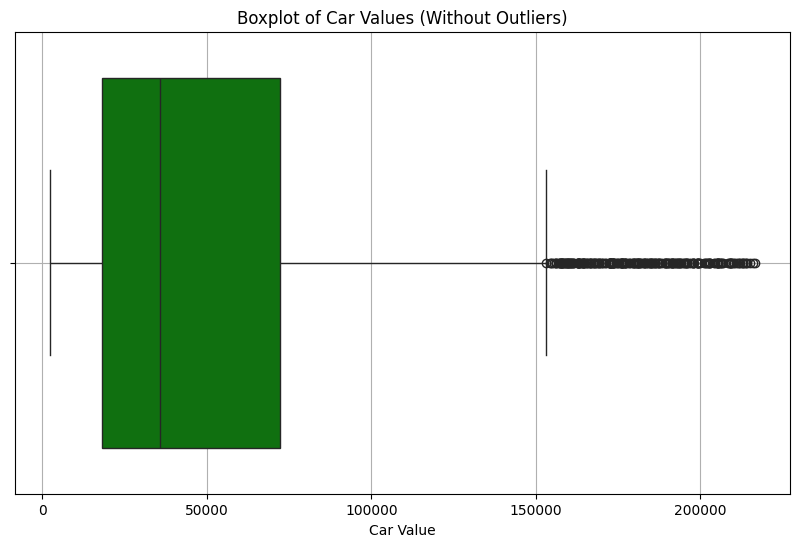

In [9]:
# Plotting the boxplot of 'valor' column without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data_for_viz['valor'], color='green')
plt.title('Boxplot of Car Values (Without Outliers)')
plt.xlabel('Car Value')

plt.grid(True)